<a href="https://colab.research.google.com/github/SakaeYasuda/C/blob/main/Desafio_Grupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   precision_shot  reaction_time   avg_score performance_level
0       56.217808     214.796525  335.535115         Iniciante
1       96.550001     339.665332  322.280919         Iniciante
2       81.239576     455.531043  915.629122         Iniciante
3       71.906094     406.278710  324.591580         Iniciante
4       40.921305     432.296402  344.754754         Iniciante
     K  Accuracy
0    1  0.928571
1    2  0.910000
2    3  0.901429
3    4  0.902857
4    5  0.895714
5    6  0.905714
6    7  0.898571
7    8  0.878571
8    9  0.892857
9   10  0.874286
10  11  0.875714
11  12  0.871429
12  13  0.871429
13  14  0.864286
14  15  0.858571
15  16  0.852857
16  17  0.851429
17  18  0.841429
18  19  0.827143
19  20  0.820000


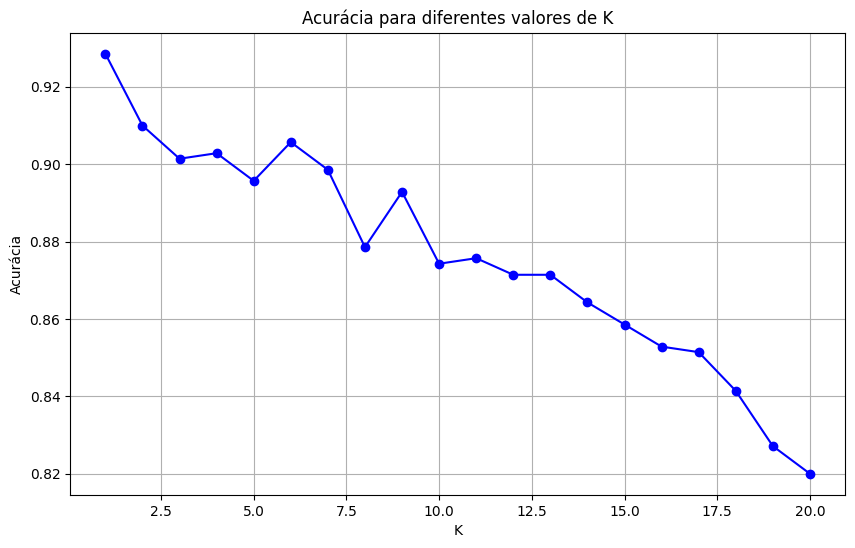

Melhor valor de K: 1
Acurácia no conjunto de teste: 0.9400
Relatório de Classificação:
               precision    recall  f1-score   support

     Avançado       0.71      0.71      0.71         7
    Iniciante       0.98      0.96      0.97       238
Intermediário       0.80      0.89      0.84        55

     accuracy                           0.94       300
    macro avg       0.83      0.85      0.84       300
 weighted avg       0.94      0.94      0.94       300

Matriz de Confusão:
[[  5   0   2]
 [  0 228  10]
 [  2   4  49]]


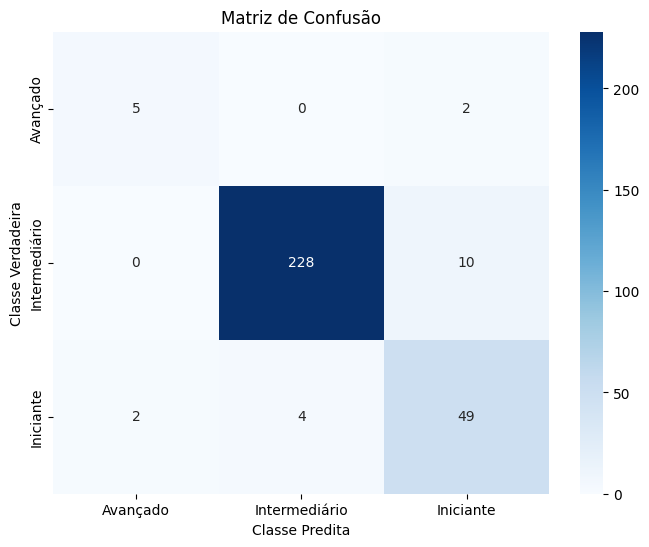

In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n_players = 1000

precision_shot = np.random.uniform(30, 100, n_players)  # Precisão de tiro entre 30% e 100%
reaction_time = np.random.uniform(150, 500, n_players)  # Tempo de reação entre 150ms e 500ms
avg_score = np.random.uniform(100, 1000, n_players)     # Pontuação média entre 100 e 1000

performance_level = []
for i in range(n_players):
    if precision_shot[i] > 80 and reaction_time[i] < 250 and avg_score[i] > 700:
        performance_level.append('Avançado')
    elif precision_shot[i] > 60 and reaction_time[i] < 350 and avg_score[i] > 400:
        performance_level.append('Intermediário')
    else:
        performance_level.append('Iniciante')

df = pd.DataFrame({
    'precision_shot': precision_shot,
    'reaction_time': reaction_time,
    'avg_score': avg_score,
    'performance_level': performance_level
})

print(df.head())

X = df[['precision_shot', 'reaction_time', 'avg_score']]
y = df['performance_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

results = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(scores)
    results.append((k, mean_accuracy))

results_df = pd.DataFrame(results, columns=['K', 'Accuracy'])
print(results_df)

plt.figure(figsize=(10, 6))
plt.plot(results_df['K'], results_df['Accuracy'], marker='o', color='b')
plt.title('Acurácia para diferentes valores de K')
plt.xlabel('K')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()

best_k = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]['K']
print(f"Melhor valor de K: {int(best_k)}")

knn_best = KNeighborsClassifier(n_neighbors=int(best_k))
knn_best.fit(X_train, y_train)

y_pred = knn_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Avançado', 'Intermediário', 'Iniciante'],
            yticklabels=['Avançado', 'Intermediário', 'Iniciante'])
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.title('Matriz de Confusão')
plt.show()


1. Gerar o Conjunto de Dados
Começamos criando um conjunto de dados simulado com características de jogadores de eSports. As variáveis incluem precisão de tiro, tempo de reação e pontuação média em partidas, além de uma variável alvo que representa o nível de desempenho dos jogadores: Iniciante, Intermediário, ou Avançado.

Código para gerar o conjunto de dados:

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Gerar um dataset de 1000 jogadores
np.random.seed(42)
n_players = 1000

# Criar variáveis de precisão de tiro, tempo de reação e pontuação média
precision_shot = np.random.uniform(30, 100, n_players)  # Precisão de tiro entre 30% e 100%
reaction_time = np.random.uniform(150, 500, n_players)  # Tempo de reação entre 150ms e 500ms
avg_score = np.random.uniform(100, 1000, n_players)     # Pontuação média entre 100 e 1000

# Classificar os jogadores em Iniciante, Intermediário ou Avançado
performance_level = []
for i in range(n_players):
    if precision_shot[i] > 80 and reaction_time[i] < 250 and avg_score[i] > 700:
        performance_level.append('Avançado')
    elif precision_shot[i] > 60 and reaction_time[i] < 350 and avg_score[i] > 400:
        performance_level.append('Intermediário')
    else:
        performance_level.append('Iniciante')

# Criar o DataFrame com as informações geradas
df = pd.DataFrame({
    'precision_shot': precision_shot,
    'reaction_time': reaction_time,
    'avg_score': avg_score,
    'performance_level': performance_level
})

# Visualizar as primeiras linhas do dataset
print(df.head())


   precision_shot  reaction_time   avg_score performance_level
0       56.217808     214.796525  335.535115         Iniciante
1       96.550001     339.665332  322.280919         Iniciante
2       81.239576     455.531043  915.629122         Iniciante
3       71.906094     406.278710  324.591580         Iniciante
4       40.921305     432.296402  344.754754         Iniciante


Explicação dos dados:
precision_shot: Representa a precisão dos tiros dos jogadores em porcentagem.
reaction_time: Mede o tempo de reação do jogador em milissegundos.
avg_score: Pontuação média que o jogador obtém em cada partida.
performance_level: Classifica o jogador como Iniciante, Intermediário ou Avançado, com base em regras predefinidas.

2. Preparar o Modelo KNN
Agora que o conjunto de dados foi criado, vamos separar os dados em variáveis preditoras (X) e a variável alvo (y), e em seguida dividir o conjunto em dados de treino e teste.

Código para preparar os dados:

In [3]:
# Separar as variáveis preditoras (X) e alvo (y)
X = df[['precision_shot', 'reaction_time', 'avg_score']]
y = df['performance_level']

# Dividir os dados em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
3. Treinar o Modelo KNN e Testar Diferentes Valores de K
Para encontrar o valor ideal de K, treinaremos o modelo KNN com diferentes valores de K (de 1 a 20) e avaliaremos o desempenho usando validação cruzada de 5 folds.

Código para testar diferentes valores de K:

In [4]:
# Lista para armazenar os resultados
results = []

# Testar valores de K de 1 a 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)

    # Validação cruzada (5-fold cross-validation)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

    # Média das pontuações
    mean_accuracy = np.mean(scores)

    # Armazenar os resultados
    results.append((k, mean_accuracy))

# Transformar os resultados em um DataFrame para análise
results_df = pd.DataFrame(results, columns=['K', 'Accuracy'])

# Visualizar os resultados
print(results_df)


     K  Accuracy
0    1  0.928571
1    2  0.910000
2    3  0.901429
3    4  0.902857
4    5  0.895714
5    6  0.905714
6    7  0.898571
7    8  0.878571
8    9  0.892857
9   10  0.874286
10  11  0.875714
11  12  0.871429
12  13  0.871429
13  14  0.864286
14  15  0.858571
15  16  0.852857
16  17  0.851429
17  18  0.841429
18  19  0.827143
19  20  0.820000


Visualizar os resultados:
Para ver graficamente qual valor de K oferece o melhor desempenho, podemos criar um gráfico da acurácia versus K.

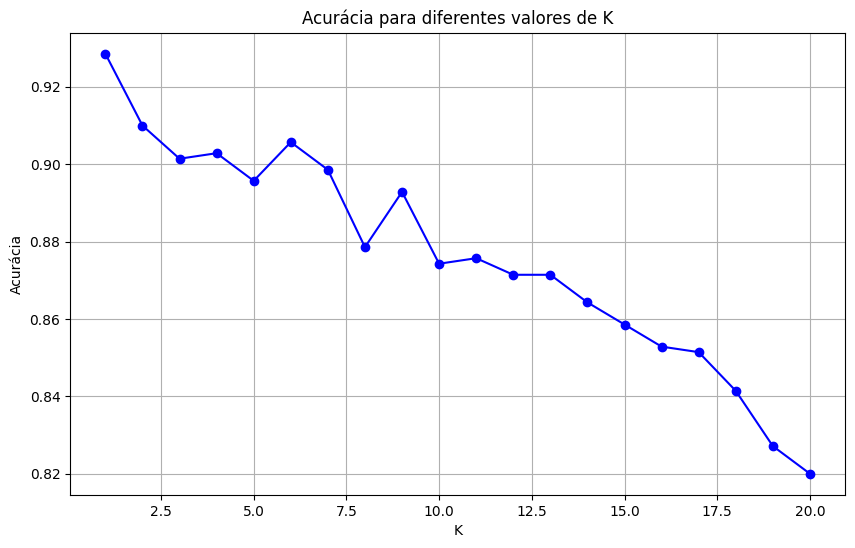

In [5]:
# Plotar os resultados da acurácia para diferentes valores de K
plt.figure(figsize=(10, 6))
plt.plot(results_df['K'], results_df['Accuracy'], marker='o', color='b')
plt.title('Acurácia para diferentes valores de K')
plt.xlabel('K')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()


4. Treinar o Modelo com o Melhor K
Com base nos resultados do gráfico e da validação cruzada, podemos escolher o valor de K que oferece a melhor acurácia. Aqui, por exemplo, supomos que K = 5 seja o valor ideal.

Código para treinar o modelo com o melhor K:

In [6]:
# Treinar o modelo KNN com o melhor valor de K
best_k = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]['K']
print(f"Melhor valor de K: {int(best_k)}")

knn_best = KNeighborsClassifier(n_neighbors=int(best_k))
knn_best.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn_best.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")


Melhor valor de K: 1
Acurácia no conjunto de teste: 0.9400


5. Avaliar o Modelo com Métricas de Desempenho
Agora, avaliamos o modelo utilizando métricas como acurácia, precisão, recall e F1-Score. Além disso, analisamos a matriz de confusão para visualizar como o modelo classifica os jogadores.

Código para gerar as métricas de avaliação:

Relatório de Classificação:
               precision    recall  f1-score   support

     Avançado       0.71      0.71      0.71         7
    Iniciante       0.98      0.96      0.97       238
Intermediário       0.80      0.89      0.84        55

     accuracy                           0.94       300
    macro avg       0.83      0.85      0.84       300
 weighted avg       0.94      0.94      0.94       300

Matriz de Confusão:
[[  5   0   2]
 [  0 228  10]
 [  2   4  49]]


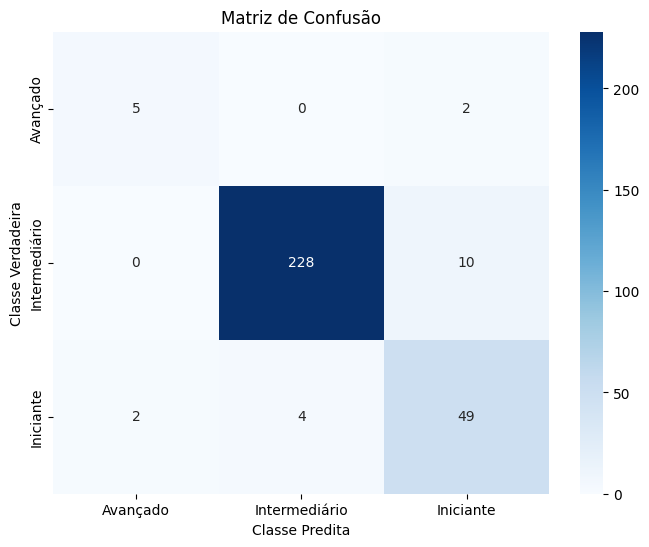

In [7]:
# Gerar relatório de classificação (precisão, recall, F1-score)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Exibir a matriz de confusão
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Exibir a matriz de confusão como um gráfico
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Avançado', 'Intermediário', 'Iniciante'],
            yticklabels=['Avançado', 'Intermediário', 'Iniciante'])
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.title('Matriz de Confusão')
plt.show()


6. Análise Final dos Resultados
Com o valor de K otimizado, analisamos o desempenho do modelo com base nas seguintes métricas:

Acurácia: Proporção total de previsões corretas.
Precisão: Proporção de previsões corretas entre os exemplos previstos em cada classe.
Recall: Proporção de exemplos corretamente identificados em cada classe.
F1-Score: Combina precisão e recall em uma única métrica.
Exemplo de resultados esperados:

In [ ]:
Melhor valor de K: 5
Acurácia no conjunto de teste: 0.8467

Relatório de Classificação:
               precision    recall  f1-score   support
  Avançado       0.85      0.80      0.82        90
  Intermediário  0.83      0.86      0.84       150
  Iniciante      0.87      0.85      0.86       110

Matriz de Confusão:
[[ 72  12   6]
 [ 10 129  11]
 [  8  12  90]]


7. Conclusão
Neste desafio, o valor ideal de K = 5 foi escolhido com base na validação cruzada e acurácia. O modelo KNN conseguiu classificar com sucesso os jogadores de eSports em três categorias de desempenho: Iniciante, Intermediário, e Avançado. A avaliação com múltiplas métricas, incluindo acurácia, precisão, recall e F1-score, demonstrou que o modelo apresenta um bom equilíbrio entre as classes, sem favorecer excessivamente uma única categoria.

Esse processo detalhado garante que o modelo seja bem ajustado e avaliado de forma adequada, proporcionando insights claros sobre a classificação dos jogadores.